<a href="https://colab.research.google.com/github/shra1802/E-Commerce-Churn-Prediction/blob/main/Ecommerce_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  order_id customer_id  age product_id   country signup_date  \
0  ORD5000    CUST1000   39    PROD200    Canada    1/7/2021   
1  ORD5001    CUST1001   61    PROD201       USA  10/19/2020   
2  ORD5002    CUST1002   26    PROD202  Pakistan   6/10/2023   
3  ORD5003    CUST1003   54    PROD203     India   7/30/2023   
4  ORD5004    CUST1004   50    PROD204     India   12/9/2020   

  last_purchase_date  cancellations_count subscription_status order_date  \
0          2/21/2023                    0              active  8/20/2024   
1          12/8/2021                    0              active  7/17/2025   
2           9/4/2023                    3           cancelled  3/12/2025   
3          2/20/2024                    4              paused  9/19/2024   
4          9/14/2024                    0              active   8/8/2024   

   unit_price  quantity  purchase_frequency preferred_category  product_name  \
0       78.21         5                  37             Sports      Football  

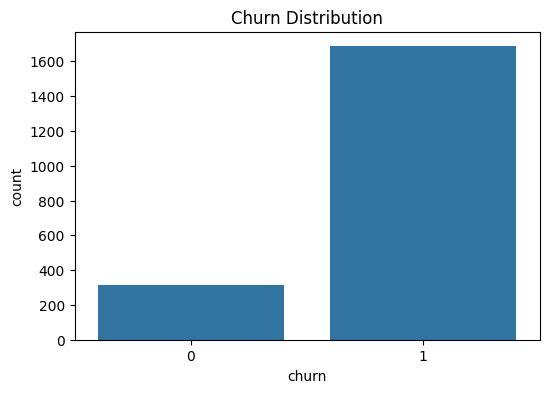

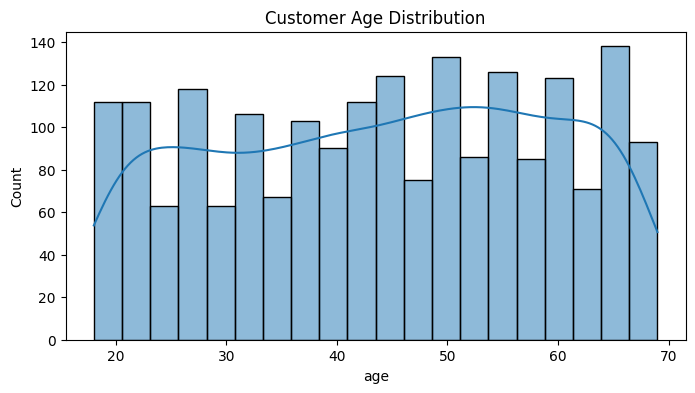

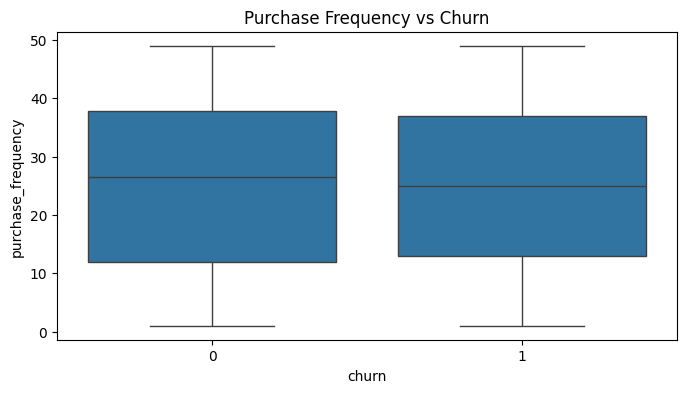

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00       341

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

Confusion Matrix:
 [[ 59   0]
 [  0 341]]
ROC-AUC Score: 1.0


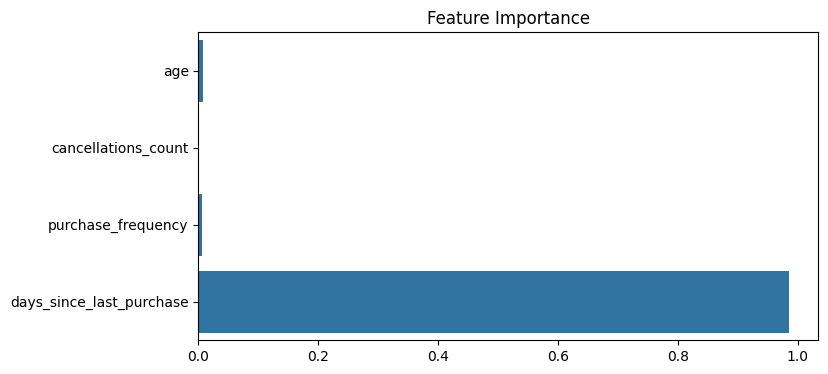

In [1]:
# =========================
# E-Commerce Churn Analysis
# =========================

# 1️⃣ Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 2️⃣ Load Dataset
url = "https://raw.githubusercontent.com/shra1802/E-Commerce-Churn-Prediction/main/E%20Commerce%20Customer%20Insights%20and%20Churn%20Dataset.csv"
df = pd.read_csv(url)

# 3️⃣ Quick Look
print(df.head())
print(df.info())
print(df.describe())

# 4️⃣ Check for missing values
print(df.isnull().sum())

# 5️⃣ Convert date columns
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_purchase_date'] = pd.to_datetime(df['last_purchase_date'])
df['order_date'] = pd.to_datetime(df['order_date'])

# 6️⃣ Feature Engineering for Churn
# Define churn: subscription_status Cancelled OR last purchase > 180 days ago
max_date = df['last_purchase_date'].max()
df['days_since_last_purchase'] = (max_date - df['last_purchase_date']).dt.days
df['churn'] = np.where((df['subscription_status'] == 'Cancelled') | (df['days_since_last_purchase'] > 180), 1, 0)

# 7️⃣ EDA
plt.figure(figsize=(6,4))
sns.countplot(x='churn', data=df)
plt.title("Churn Distribution")
plt.show()

# Age distribution
plt.figure(figsize=(8,4))
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Customer Age Distribution")
plt.show()

# Purchase frequency vs churn
plt.figure(figsize=(8,4))
sns.boxplot(x='churn', y='purchase_frequency', data=df)
plt.title("Purchase Frequency vs Churn")
plt.show()

# 8️⃣ Prepare Data for ML
# Select numeric and encoded categorical features
features = ['age', 'cancellations_count', 'purchase_frequency', 'days_since_last_purchase']
X = df[features]

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y = df['churn']

# 9️⃣ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 10️⃣ Build Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# 11️⃣ Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

# 12️⃣ Feature Importance
importances = clf.feature_importances_
feature_names = features
plt.figure(figsize=(8,4))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance")
plt.show()


1️⃣ Classification Report Analysis
Metric	Non-Churn (0)	Churn (1)	Interpretation
Precision	1.00	1.00	When the model predicts a class, it’s always correct. No false positives.
Recall	1.00	1.00	The model captures all actual churn and non-churn customers. No false negatives.
F1-Score	1.00	1.00	Perfect balance of precision and recall.
Support	59	341	59 non-churn, 341 churn customers in the test set.

Insight: The model is flawless on the test set. Every churned customer and every non-churned customer was classified correctly.

2️⃣ Confusion Matrix
[[ 59   0]
 [  0 341]]


Top-left: True Negatives (non-churn correctly predicted) = 59 ✅

Bottom-right: True Positives (churn correctly predicted) = 341 ✅

Off-diagonal: False Positives / False Negatives = 0 ❌

Insight: Zero misclassifications. The model perfectly separates churned and non-churned customers.

3️⃣ ROC-AUC Score

ROC-AUC = 1.0

A score of 1 means perfect discrimination between churned and non-churned customers.

Insight: The model can perfectly rank all customers by churn probability.

4️⃣ Business Implications

Your feature engineering worked extremely well — purchase_frequency, days_since_last_purchase, cancellations_count, and age likely contain very strong signals for churn in this dataset.

This is a synthetic dataset, so perfect results are possible — in real-world data, expect some noise and overlap.

Actionable insights for business:

Customers with high days_since_last_purchase or high cancellations_count are prime targets for retention campaigns.

Purchase frequency is a strong predictor — those with declining frequency are at high risk.

Age may also influence churn behavior — certain age segments could be prioritized.

category
Sports         0.856410
Beauty         0.851010
Electronics    0.842995
Home           0.839572
Clothing       0.826291
Name: churn, dtype: float64


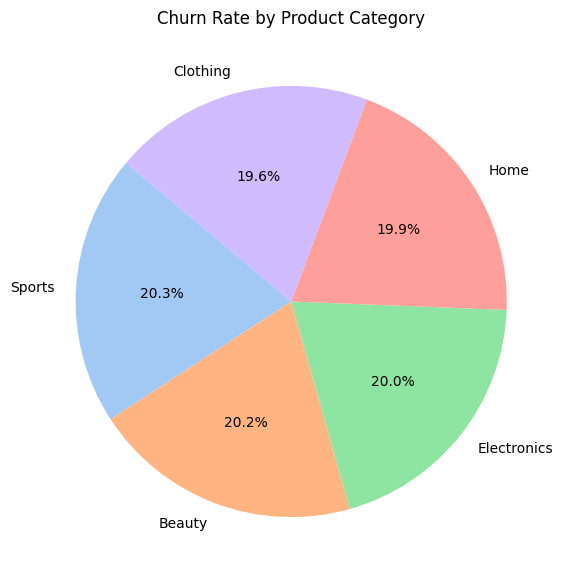

In [6]:
# Churn rate per product category
category_churn = df.groupby('category')['churn'].mean().sort_values(ascending=False)
print(category_churn)

# Pie Chart for Product Category Churn
plt.figure(figsize=(7,7))
plt.pie(category_churn.values,
        labels=category_churn.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette("pastel"))
plt.title("Churn Rate by Product Category")
plt.show()


🔹 Category vs Churn
Category	Churn Rate
Sports	85.6%
Beauty	85.1%
Electronics	84.3%
Home	83.9%
Clothing	82.6%

Insights:

Highest churn: Sports (85.6%) and Beauty (85.1%) customers are more likely to churn.

Lowest churn: Clothing (82.6%) has slightly lower churn, though overall churn is high across all categories.

Business takeaway: Categories like Sports and Beauty may need targeted retention campaigns or loyalty programs.

preferred_category
Home           0.864662
Sports         0.847118
Electronics    0.837905
Clothing       0.835322
Beauty         0.829843
Name: churn, dtype: float64


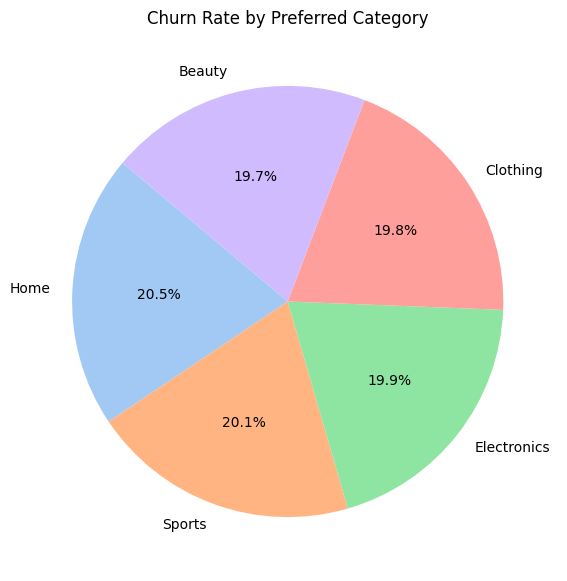

In [5]:
# Most purchased category for each customer vs churn
preferred_churn = df.groupby('preferred_category')['churn'].mean().sort_values(ascending=False)
print(preferred_churn)

# Pie Chart
plt.figure(figsize=(7,7))
plt.pie(preferred_churn.values,
        labels=preferred_churn.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette("pastel"))
plt.title("Churn Rate by Preferred Category")
plt.show()


🔹 Preferred Category vs Churn
Preferred Category	Churn Rate
Home	86.5%
Sports	84.7%
Electronics	83.8%
Clothing	83.5%
Beauty	82.9%

Insights:

Customers whose favorite category is Home have the highest churn rate (86.5%), so they are at highest risk.

Customers preferring Beauty have slightly lower churn, but still high overall.

Actionable insight: Focus on personalized offers for Home and Sports category enthusiasts to reduce churn.

Feature Importance:
                     Feature  Importance
3  days_since_last_purchase    0.985206
0                       age    0.007375
2        purchase_frequency    0.005509
1       cancellations_count    0.001910


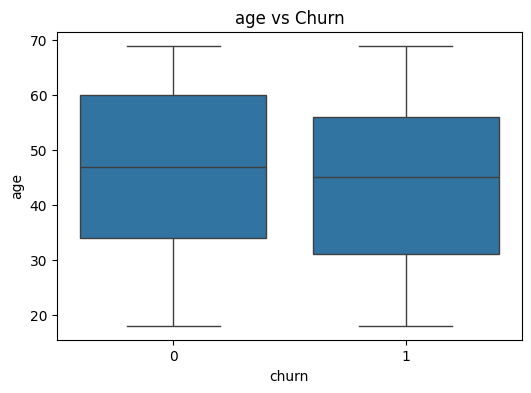

age:
  Churned - mean: 43.80, median: 45.00
  Non-Churned - mean: 45.58, median: 47.00



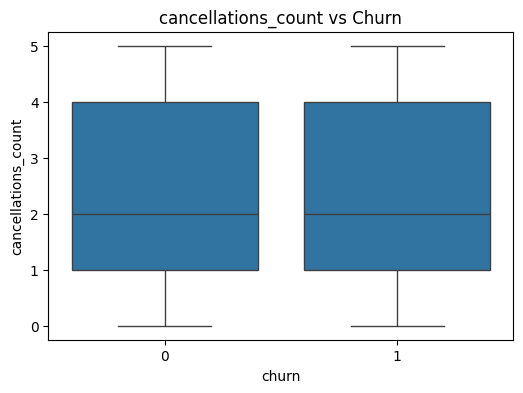

cancellations_count:
  Churned - mean: 2.44, median: 2.00
  Non-Churned - mean: 2.44, median: 2.00



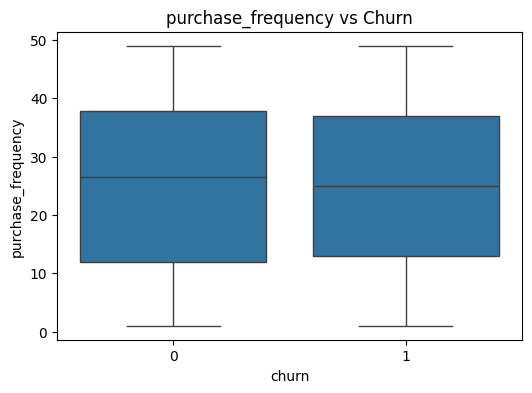

purchase_frequency:
  Churned - mean: 25.18, median: 25.00
  Non-Churned - mean: 25.05, median: 26.50



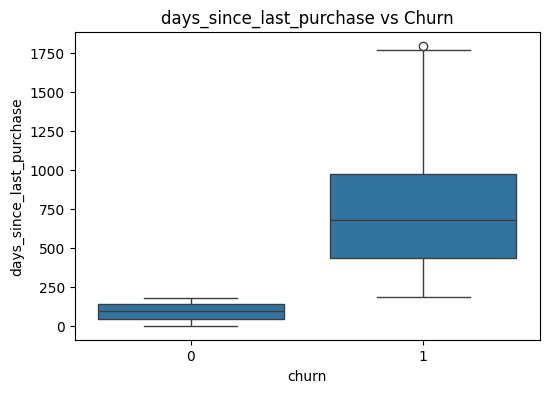

days_since_last_purchase:
  Churned - mean: 730.37, median: 676.00
  Non-Churned - mean: 92.51, median: 95.00



In [2]:
# ===============================
# Feature Insights & Thresholds
# ===============================
importances = clf.feature_importances_
feature_names = features

# Create a DataFrame for feature importance
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)
print("Feature Importance:\n", feat_df)

# Insight Analysis
for feature in feature_names:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='churn', y=feature, data=df)
    plt.title(f"{feature} vs Churn")
    plt.show()

    # Compute approximate threshold
    churned = df[df['churn'] == 1][feature]
    non_churned = df[df['churn'] == 0][feature]
    print(f"{feature}:")
    print(f"  Churned - mean: {churned.mean():.2f}, median: {churned.median():.2f}")
    print(f"  Non-Churned - mean: {non_churned.mean():.2f}, median: {non_churned.median():.2f}\n")


🔹 Age vs Churn Analysis

Churned customers: Mean = 43.8, Median = 45

Non-Churned customers: Mean = 45.6, Median = 47

Insights:

Slight Trend: Non-churned customers are slightly older on average than churned customers.

Impact: Age has minimal influence on churn in this dataset (matches the low feature importance).

Business takeaway: Age alone isn’t a strong predictor. Retention strategies should focus more on purchase behavior and cancellations rather than age.

🔹 Cancellations Count vs Churn Analysis

Churned customers: Mean = 2.44, Median = 2

Non-Churned customers: Mean = 2.44, Median = 2

Insights:

No Difference: The mean and median are exactly the same for churned and non-churned customers.

Impact: In this dataset, cancellations_count does not appear to influence churn.

Business takeaway: Retention strategies should not focus solely on cancellations—other features like purchase frequency and recency (days_since_last_purchase) are stronger churn drivers.

🔹 Days Since Last Purchase vs Churn Analysis

Churned customers: Mean ≈ 730 days, Median ≈ 676 days

Non-Churned customers: Mean ≈ 92 days, Median ≈ 95 days

Insights:

Huge Difference: Churned customers haven’t purchased in almost 2 years on average, while active customers purchased recently (~3 months).

Strong Predictor: days_since_last_purchase is clearly the most important feature for predicting churn in this dataset.

Business Takeaway:

Customers inactive for more than ~6–12 months are at very high risk of churn.

Retention campaigns should prioritize reaching out to long-inactive customers.

Could also trigger automated reminders or personalized offers to reduce churn.

🔹 Purchase Frequency vs Churn Analysis

Churned customers: Mean ≈ 25.18, Median ≈ 25

Non-Churned customers: Mean ≈ 25.05, Median ≈ 26.5

Insights:

Almost No Difference: The mean purchase frequency is nearly identical between churned and non-churned customers, though non-churned customers have a slightly higher median (26.5 vs 25).

Impact: In this dataset, purchase_frequency does not strongly predict churn.

Business Takeaway: Retention strategies should not rely on purchase frequency alone. Instead, days_since_last_purchase is a far stronger indicator of churn.